In [1]:
# Library import
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Read data
'''
Dataset information:
    These data are the results of a chemical analysis of wines grown in the same region in Italy 
    but derived from three different cultivars. The analysis determined the quantities of 13 constituents found 
    in each of the three types of wines.
'''
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)

#Rename columns
df_wine.columns = ['Quatily', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline'] 
# Print 5 rows on top
df_wine.head()

,Quatily,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
#shape of data, 178 rows, 13 features and 1 label
df_wine.shape

(178, 14)

In [4]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

# Review the steps of PCA algorithm:
1. Standardize the dataset.
2. Calculate the covariance matrix for the features in the dataset.
3. Calculate the eigenvalues and eigenvectors for the covariance matrix.
4. Sort eigenvalues and their corresponding eigenvectors.
5. Pick k eigenvalues and form a matrix of eigenvectors.
6. Transform the original matrix by the matrix of eigenvectors.

In [5]:
X_std = (X - X.mean(axis = 0))/X.std(axis = 0, ddof = 1)

In [6]:
def findNumPC(X, thres = 0.95):
    '''
        Find the number of major component vectors
        -----------------------
        Parameters:
            X : numpy-ndarray
                the original matrix 
            thres: float, default = 0.95
                Threshold of information we want to keep from data 
                (by default we keep 95% of the original data)
        -----------------------
        Return:
            the number of major component vectors
    '''
    # Standardize the dataset
    X_std = (X - X.mean(axis = 0))/X.std(axis = 0, ddof = 1)
    # Calculate the covariance matrix for the features in the dataset.
    cov_mat = np.cov(X_std.T, bias = 0)
    # Calculate the eigenvalues and eigenvectors for the covariance matrix.
    eigenvals, eigenvectors = np.linalg.eig(cov_mat)
    eigenvals = sorted(eigenvals,reverse=True)
    # Sum the eigenvalues
    cumsum = np.cumsum(eigenvals)
    # Percentage calculation
    cumsum /= cumsum[-1]
    # To visualize the amount of information obtained for each individual vector
    fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 8), sharex = True)
    axes[0].plot(range(len(eigenvals)), eigenvals, marker = '.', color = 'b', label = 'Eigenvalue')
    axes[1].plot(range(len(cumsum)), cumsum, marker = '.', color = 'r', label = 'Cumulative propotion')
    axes[0].legend()
    axes[1].legend()
    plt.show()

    # Repeats each element in the cumsum, 
    # when the incremental percentage just reaches the threshold, we stop
    for i, val in enumerate(cumsum):
        if val >= thres:
            return i + 1

def PCA_Method(X, n_components=None):
    '''
    Linear dimensionality reduction using Singular Value Decomposition of the data 
    to project it to a lower dimensional space.
    --------------------------    
        Parameters:
            X : numpy-ndarray
                the original matrix 
            n_components: int or None. default = None.
                the number of major component vectors
    --------------------------    
        Return:
            Transform matrix by the matrix of eigenvectors.
    '''
    # Standardize the dataset
    X_std = (X - X.mean(axis = 0))/X.std(axis = 0, ddof = 1)
    # Calculate the covariance matrix for the features in the dataset.
    cov_mat = np.cov(X_std.T, bias = 0)
    # Calculate the eigenvalues and eigenvectors for the covariance matrix.
    eigen_val, eigen_vectors = np.linalg.eig(cov_mat)
    # Pick k eigenvalues and form a matrix of eigenvectors.
    top_eigen_vectors = eigen_vectors[:,:n_components]
    # Transform the original matrix by the matrix of eigenvectors.
    transformed_data = np.matmul(np.array(X_std),top_eigen_vectors)
    return transformed_data  

In [7]:
X_PCA = PCA_Method(X)

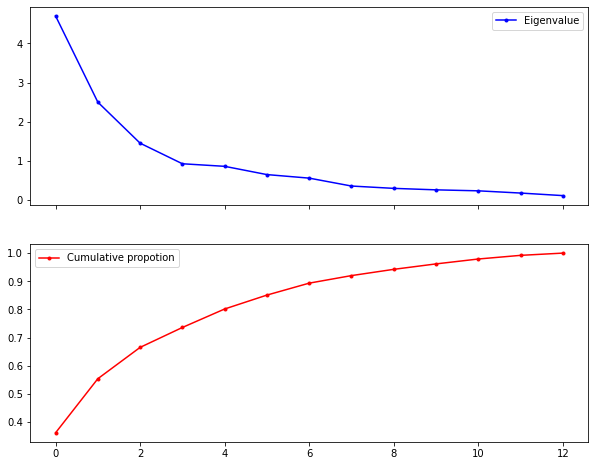

10

In [12]:
# It takes 10 vectors ourselves to retain 95% of the data's information
findNumPC(X,thres=0.95)


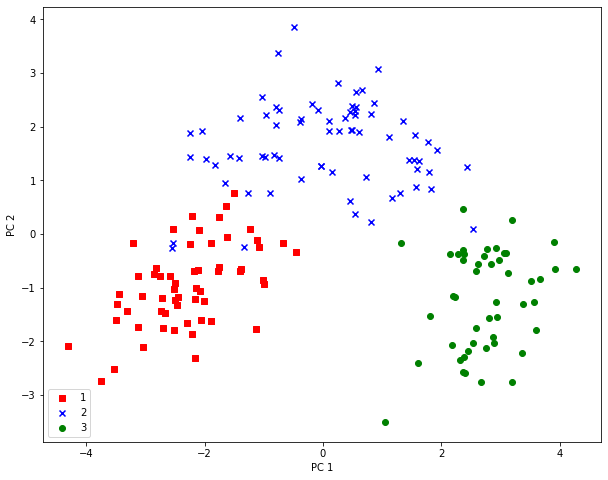

In [9]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

fig, ax = plt.subplots(figsize = (10, 8))

for l, c, m in zip(np.unique(y), colors, markers):
    ax.scatter(X_PCA[y == l, 0], X_PCA[y == l, 1], c = c, label = l, marker = m)
ax.set(xlabel = 'PC 1', ylabel = 'PC 2')
plt.legend(loc='lower left')
plt.show()

# Using library sklearn

In [10]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_std)


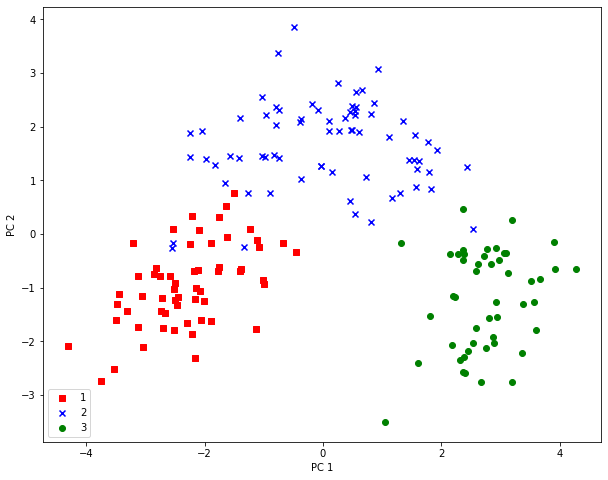

In [11]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

fig, ax = plt.subplots(figsize = (10, 8))

for l, c, m in zip(np.unique(y), colors, markers):
    ax.scatter(X_pca[y == l, 0]*(-1), X_pca[y == l, 1], c = c, label = l, marker = m)
ax.set(xlabel = 'PC 1', ylabel = 'PC 2')
plt.legend(loc='lower left')
plt.show()